## –ê–Ω–∞–ª–∏–∑ —Ç–æ–ø-200 –≤–∏–¥–µ–æ YouTube –≤ –≤—ã–¥–∞—á–µ –ø–æ –∑–∞–ø—Ä–æ—Å—É "A/–ë —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ" 

–í –¥–∞–Ω–Ω–æ–º –º–∏–Ω–∏-–ø—Ä–æ–µ–∫—Ç–µ –ø—Ä–æ–≤–µ–¥–µ–Ω –∞–Ω–∞–ª–∏–∑ —Ç–æ–ø-200 –≤–∏–¥–µ–æ YouTube (–ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –Ω–∞–∏–±–æ–ª—å—à–µ–≥–æ —á–∏—Å–ª–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤) –≤ –≤—ã–¥–∞—á–µ –ø–æ –∑–∞–ø—Ä–æ—Å—É "–∞/–± —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ". 

–î–∞–Ω–Ω—ã–µ –æ –≤–∏–¥–µ–æ –ø–æ–ª—É—á–µ–Ω—ã —Å –ø–æ–º–æ—â—å—é –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è API YouTube.

–î–ª—è —Ä–∞–±–æ—Ç—ã —Å –∫–æ–¥–æ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —É–Ω–∏–∫–∞–ª—å–Ω—ã–π –∫–ª—é—á API. –≠—Ç–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –ø–æ –¥–∞–Ω–Ω–æ–π —Å—Å—ã–ª–∫–µ: https://console.cloud.google.com. 

In [17]:
import googleapiclient.discovery as api
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string 
plt.rcParams["figure.figsize"] = (10,5)

In [18]:
key = '' #–ø–æ–¥—Å—Ç–∞–≤–ª—è–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–π –∫–ª—é—á API
youtube = api.build('youtube', 'v3', developerKey = key)

In [19]:
def get_info_about_videos(request_name, max_pages):
    
    pages = 0
    next_page_token = None
    all_data = []
    
    while pages != max_pages: 
        
        if next_page_token is None: 
            
            request_search = youtube.search().list(
                part = "id",
                maxResults = 50,
                q = request_name,
                type = 'video',
                order = 'viewCount') #–≤—ã–±–∏—Ä–∞–µ–º —Ç–æ–ø –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ 
        
            response_search = request_search.execute()
            
            next_page_token = response_search['nextPageToken']
            pages += 50
        
            video_ids = []

            for video in response_search['items']:
                video_ids.append(video['id']['videoId'])
            
            video_request = youtube.videos().list(
                part = ['snippet', 'contentDetails', 'id', 'statistics'],
                id = video_ids
            )
        
            video_response = video_request.execute()
        
            all_data = pd.json_normalize(video_response['items'])

    
        else: 
            
            request_search = youtube.search().list(
                part = "id",
                maxResults = 50,
                q = request_name,
                type = 'video',
                pageToken = next_page_token, 
                order = 'viewCount') #–≤—ã–±–∏—Ä–∞–µ–º —Ç–æ–ø –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ 
        
            response_search = request_search.execute()
            
            next_page_token = response_search['nextPageToken']
            pages += 50
        
            video_ids = []

            for video in response_search['items']:
                video_ids.append(video['id']['videoId'])
            
            video_request = youtube.videos().list(
                part = ['snippet', 'contentDetails', 'id', 'statistics'],
                id = video_ids
            )
        
            video_response = video_request.execute()
        
            data = pd.json_normalize(video_response['items'])
        
            all_data = pd.concat([all_data, data], ignore_index=True)
    
    return all_data

In [20]:
data = get_info_about_videos("–∞/–± —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ", 200)

In [21]:
data = data.drop(columns=['snippet.thumbnails.default.width', 'snippet.thumbnails.default.height', 
                  'snippet.thumbnails.medium.url', 'snippet.thumbnails.medium.width', 
                  'snippet.thumbnails.medium.height','snippet.thumbnails.high.url', 
                  'snippet.thumbnails.high.width', 'snippet.thumbnails.high.height', 
                  'snippet.localized.title','snippet.localized.description', 
                  'contentDetails.dimension', 'statistics.favoriteCount', 
                  'snippet.thumbnails.standard.url', 'snippet.thumbnails.standard.width',
                  'snippet.thumbnails.standard.height', 'snippet.thumbnails.maxres.url',
                  'snippet.thumbnails.maxres.width', 'snippet.thumbnails.maxres.height',
                  'snippet.defaultLanguage'])

In [22]:
data = data.rename(columns={
    'snippet.publishedAt': 'publishedAt',
    'snippet.channelId': 'channelId',
    'snippet.title': 'title',
    'snippet.description': 'description',
    'snippet.channelTitle': 'channelTitle',
    'snippet.thumbnails.default.url': 'thumbnails.default.url',
    'snippet.channelTitle': 'channelTitle',
    'snippet.tags': 'tags',
    'snippet.categoryId': 'categoryId',
    'snippet.liveBroadcastContent': 'liveBroadcastContent',
    'snippet.defaultAudioLanguage': 'defaultAudioLanguage',
    'contentDetails.duration': 'duration',
    'contentDetails.definition': 'definition', 
    'contentDetails.caption': 'caption', 
    'contentDetails.licensedContent': 'licensedContent',   
    'contentDetails.projection': 'projection', 
    'statistics.viewCount': 'viewCount', 
    'statistics.likeCount': 'likeCount',
    'statistics.commentCount': 'commentCount'   
})

In [23]:
data.shape

(200, 21)

In [24]:
data.head()

kind                         etag           id  \
0  youtube#video  OSOnXX8PJx2C0uutCIYi4wlUOZ0  dFCJysbOJ8c   
1  youtube#video  X4pLclRhgtMMADLqrZ3VJEJAAR8  gljfGAkgX_o   
2  youtube#video  TM5J1oYFw1hLstcKj4DTZCWjrp0  aNX8E3dGHiQ   
3  youtube#video  b6tqijwRrkn3G5r-C4UmFwcXPjo  7tzBhPwOgv8   
4  youtube#video  E6JtYdWfydRWWmzf72Wa0BX-oBM  2nP_gcut7SU   

            publishedAt                 channelId  \
0  2020-05-19T11:00:10Z  UCJW6T-E47kOBuolzP-biA2A   
1  2020-09-01T12:46:04Z  UCiZtj9HjyudBwC2TywG0GzQ   
2  2020-02-25T16:17:38Z  UCvegsSk_hsB590UG3_kKdFw   
3  2014-11-07T19:56:37Z  UCACDF1R8fPjfkYn5pbuOXdg   
4  2021-06-15T18:43:07Z  UCiZtj9HjyudBwC2TywG0GzQ   

                                               title  \
0  –ê–Ω–∞—Ç–æ–ª–∏–π –ö–∞—Ä–ø–æ–≤ - A/B-—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ: –∫–∞–∫ —Å–¥–µ–ª–∞—Ç...   
1  –ù–∏–∫–∏—Ç–∞ –ú–∞—Ä—à–∞–ª–∫–∏–Ω: A/B-—Ç–µ—Å—Ç—ã —Å–ª–æ–∂–Ω–µ–µ, —á–µ–º –∫–∞–∂–µ—Ç...   
2  –ö–∞–∫ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–æ–≤–æ–¥–∏—Ç—å —Ä–µ–∫–ª–∞–º–Ω—ã–µ —Ç–µ—Å—Ç—ã? –†–µ–∫–ª–∞...   
3              –ö–ê–ö –ü–†–û–í–û–î–ò–¢–¨ A/B –¢–ï–°–¢–ò–†–û–í–ê–ù–ò–ï –°–ê–ô–¢–ê?   
4  –ö–∞–∫ –∏ –∑–∞—á–µ–º –æ—Ü–µ–Ω–∏–≤–∞—Ç—å —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è A/B —Ç...   

                                         description  \
0  –°–æ–≤—Å–µ–º —Å–∫–æ—Ä–æ –ú–∞—Ç–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥-22, 17-18 –Ω–æ—è–±—Ä—è\n–ü...   
1  –°–∏–º—É–ª—è—Ç–æ—Ä A/B-—Ç–µ—Å—Ç–æ–≤: http://bit.ly/40uPpjt \n...   
2  –í —ç—Ç–æ–º –≤–∏–¥–µ–æ —Ä–∞–∑–±–∏—Ä–∞–µ–º –º–µ—Ç–æ–¥–∏–∫–∏ –∏ –ø–æ–¥—Ö–æ–¥—ã —ç—Ñ—Ñ–µ...   
3  –ö–∞–∫ —É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–Ω–≤–µ—Ä—Å–∏—é —Å–∞–π—Ç–∞?\n–ö–∞–∫ –ø—Ä–æ–≤–æ–¥–∏—Ç—å ...   
4  –°—Å—ã–ª–∫–∞ –Ω–∞ –Ω–æ—É—Ç–±—É–∫: https://drive.google.com/dr...   

                           thumbnails.default.url  \
0  https://i.ytimg.com/vi/dFCJysbOJ8c/default.jpg   
1  https://i.ytimg.com/vi/gljfGAkgX_o/default.jpg   
2  https://i.ytimg.com/vi/aNX8E3dGHiQ/default.jpg   
3  https://i.ytimg.com/vi/7tzBhPwOgv8/default.jpg   
4  https://i.ytimg.com/vi/2nP_gcut7SU/default.jpg   

                              channelTitle  \
0                            –ú–∞—Ç–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥   
1                           karpov.courses   
2  Targetorium: —à–∫–æ–ª–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –∏ —Ä–µ–∫–ª–∞–º—ã   
3                         –ê–ª–µ–∫—Å–∞–Ω–¥—Ä –£–ª–∏—Ç–∏–Ω   
4                           karpov.courses   

                                                tags  ...  \
0  [–∞–Ω–∞—Ç–æ–ª–∏–π –∫–∞—Ä–ø–æ–≤, –º–∞—Ç–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥, –∞–Ω–∞–ª–∏—Ç–∏–∫–∞, –∞–±...  ...   
1  [Data science, –ê–Ω–∞–ª–∏—Ç–∏–∫–∞ –¥–∞–Ω–Ω—ã—Ö, –ê–Ω–∞–ª–∏—Ç–∏–∫–∞, –∫–∞...  ...   
2  [—Ä–µ–∫–ª–∞–º–∞ –≤ –§–µ–π—Å–±—É–∫–µ, —Ä–µ–∫–ª–∞–º–∞ –≤ Facebook, —Ä–µ–∫–ª–∞...  ...   
3  [A/B —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ, –ê/–ë —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ, –ê–ë —Ç–µ—Å—Ç–∏—Ä...  ...   
4  [–ê–Ω–∞–ª–∏—Ç–∏–∫–∞, –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö, –º–∞—à–∏–Ω–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ, ...  ...   

  liveBroadcastContent defaultAudioLanguage    duration definition caption  \
0                 none                   ru    PT44M25S         hd   false   
1                 none                  NaN    PT37M20S         hd   false   
2                 none                   ru     PT14M5S         hd   false   
3                 none                   ru     PT5M28S         hd    true   
4                 none                  zxx  PT1H27M39S         hd   false   

  licensedContent   projection viewCount likeCount commentCount  
0            True  rectangular     46767      1584           41  
1            True  rectangular     43698      1876           55  
2           False  rectangular     38416      1204           73  
3           False  rectangular     32922       846           30  
4           False  rectangular     31385      1122           50  

[5 rows x 21 columns]

#### –¢–æ–ø-10 –∫–∞–Ω–∞–ª–æ–≤ –ø–æ –æ–±—â–µ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –≤–∏–¥–µ–æ 

In [25]:
data['viewCount'] = data['viewCount'].fillna(0).astype(int)
data.groupby('channelTitle')['viewCount'].sum().sort_values(ascending = False).head(10)

channelTitle
karpov.courses                             111352
–ú–∞—Ç–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥                               87167
Targetorium: —à–∫–æ–ª–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –∏ —Ä–µ–∫–ª–∞–º—ã     38416
Noukash                                     33016
–ê–ª–µ–∫—Å–∞–Ω–¥—Ä –£–ª–∏—Ç–∏–Ω                            32922
–ê–∫–∞–¥–µ–º–∏—è –Ø–Ω–¥–µ–∫—Å–∞                            26543
VK Team                                     24558
–£–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –ø—Ä–æ–µ–∫—Ç–∞–º–∏ –∏ –ø—Ä–æ–¥—É–∫—Ç–æ–º            20044
PromoPult                                   20039
Tilda Publishing                            19313
Name: viewCount, dtype: int64

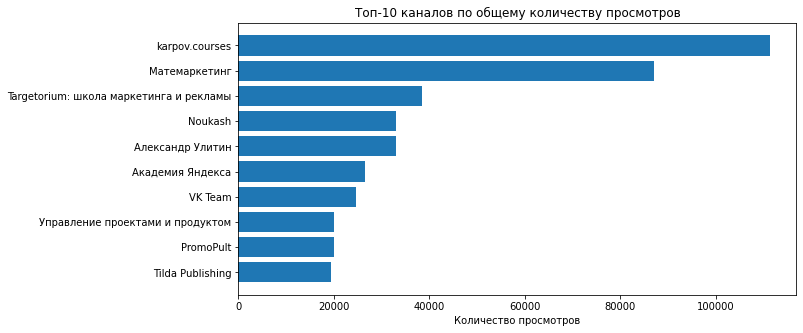

In [26]:
plt.barh(np.array(data.groupby('channelTitle')['viewCount'].sum().sort_values(ascending = False).head(10).index),
    np.array(data.groupby('channelTitle')['viewCount'].sum().sort_values(ascending = False).head(10).values))
plt.gca().invert_yaxis()
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤')
plt.title('–¢–æ–ø-10 –∫–∞–Ω–∞–ª–æ–≤ –ø–æ –æ–±—â–µ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤')
plt.show()

#### –¢–æ–ø-10 –∫–∞–Ω–∞–ª–æ–≤ –ø–æ –æ–±—â–µ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ª–∞–π–∫–æ–≤  

In [27]:
data['likeCount'] = data['likeCount'].fillna(0).astype(int)
data.groupby('channelTitle')['likeCount'].sum().sort_values(ascending = False).head(10)

channelTitle
karpov.courses                             4306
–ú–∞—Ç–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥                              2937
Noukash                                    1865
Targetorium: —à–∫–æ–ª–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –∏ —Ä–µ–∫–ª–∞–º—ã    1204
–ú–∏—Ö–∞–π–ª–æ –î—É–±—á–∞–∫                              987
–ê–ª–µ–∫—Å–∞–Ω–¥—Ä –£–ª–∏—Ç–∏–Ω                            846
–ê–∫–∞–¥–µ–º–∏—è –Ø–Ω–¥–µ–∫—Å–∞                            737
–£–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –ø—Ä–æ–µ–∫—Ç–∞–º–∏ –∏ –ø—Ä–æ–¥—É–∫—Ç–æ–º            662
–¢—Ä–µ–π–¥–µ—Ä –ê–ë | –¢—Ä–µ–π–¥–∏–Ω–≥ –∏ –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–∏`         566
Go Viral Central Asia                       537
Name: likeCount, dtype: int64

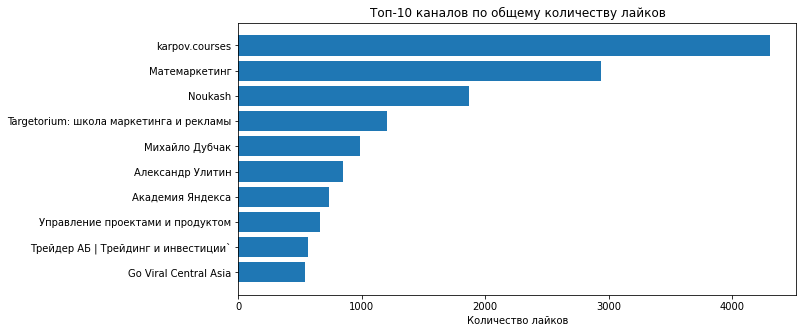

In [28]:
plt.barh(np.array(data.groupby('channelTitle')['likeCount'].sum().sort_values(ascending = False).head(10).index),
    np.array(data.groupby('channelTitle')['likeCount'].sum().sort_values(ascending = False).head(10).values))
plt.gca().invert_yaxis()
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–∞–π–∫–æ–≤')
plt.title('–¢–æ–ø-10 –∫–∞–Ω–∞–ª–æ–≤ –ø–æ –æ–±—â–µ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ª–∞–π–∫–æ–≤')
plt.show()

–ö–∞–∫ –ø–æ –æ–±—â–µ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –≤–∏–¥–µ–æ, –≤—Ö–æ–¥—è—â–∏—Ö –≤ —Ç–æ–ø-200 –ø–æ –∑–∞–ø—Ä–æ—Å—É "–∞/–± —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ", —Ç–∞–∫ –∏ –ø–æ –æ–±—â–µ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ª–∞–π–∫–æ–≤ —Å—Ä–µ–¥–∏ —Ç–∞–∫–∏—Ö –≤–∏–¥–µ–æ, –Ω–∞–∏–≤—ã—Å—à–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∏–º–µ—é—Ç –∫–∞–Ω–∞–ª—ã "karpov.courses" –∏ "–ú–∞—Ç–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥". –ü—Ä–∏ —ç—Ç–æ–º, —Å—Ç–æ–∏—Ç –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ —ç—Ç–∏ –∫–∞–Ω–∞–ª—ã –≤—Ö–æ–¥—è—Ç –≤ —Ç–æ–ø-5 –∫–∞–Ω–∞–ª–æ–≤ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –≤—ã–ø—É—â–µ–Ω–Ω—ã—Ö –≤–∏–¥–µ–æ –Ω–∞ –∏—Å—Å–ª–µ–¥—É–µ–º—É—é —Ç–µ–º–∞—Ç–∏–∫—É, –ø–æ–ø–∞–≤—à–∏—Ö –≤ —Ç–æ–ø-200 –ø–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞–º. –í —Ç–æ–º —á–∏—Å–ª–µ –ø–æ —ç—Ç–æ–π –ø—Ä–∏—á–∏–Ω–µ –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –∏ –ª–∞–π–∫–æ–≤ –≤–∏–¥–µ–æ —Å —ç—Ç–∏—Ö –∫–∞–Ω–∞–ª–æ–≤ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –≤—ã—Å–æ–∫–æ–µ. 

#### –¢–æ–ø-10 –∫–∞–Ω–∞–ª–æ–≤ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –≤—ã–ø—É—â–µ–Ω–Ω—ã—Ö –≤–∏–¥–µ–æ –Ω–∞ –∏—Å—Å–ª–µ–¥—É–µ–º—É—é —Ç–µ–º–∞—Ç–∏–∫—É, –ø–æ–ø–∞–≤—à–∏—Ö –≤ —Ç–æ–ø-200 –ø–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞–º

In [29]:
data.groupby('channelTitle')['kind'].count().sort_values(ascending = False).head(10)

channelTitle
–ê–∫–∞–¥–µ–º—ñ—è —ñ–Ω—Ç–µ—Ä–Ω–µ—Ç-–º–∞—Ä–∫–µ—Ç–∏–Ω–≥—É WebPromoExperts    8
–ú–∞—Ç–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥                                   5
ASO —Å–µ–∫—Ä–µ—Ç—ã                                     5
karpov.courses                                  5
Productstar                                     4
PPC-SCI                                         4
–¢–µ–ø–ª–∏—Ü–∞ —Å–æ—Ü–∏–∞–ª—å–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π                   4
–†–∞–∑—Ä–∞–±–æ—Ç–∫–∞                                      3
ProductSense                                    3
Kolesa Group                                    3
Name: kind, dtype: int64

In [30]:
data.groupby('channelTitle')['kind'].count().mean()

1.4705882352941178

#### –¢–æ–ø-10 –∫–∞–Ω–∞–ª–æ–≤ –ø–æ –æ–±—â–µ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ 

In [31]:
data['commentCount'] = data['commentCount'].fillna(0).astype(int)
data.groupby('channelTitle')['commentCount'].sum().sort_values(ascending = False).head(10)

channelTitle
karpov.courses                             184
Noukash                                    133
–ï–≤–≥–µ–Ω–∏–π –ì—Ä–∏—à–∞–∫–æ–≤                           118
–ú–∏—Ö–∞–π–ª–æ –î—É–±—á–∞–∫                              84
–ú–∞–∫—Å –°–ª–æ–±–æ–¥—è–Ω—é–∫                             82
Targetorium: —à–∫–æ–ª–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –∏ —Ä–µ–∫–ª–∞–º—ã     73
Lead Genic                                  69
–î–∞–Ω—è –ú—ã—Ü—ã–∫                                  63
–¢—Ä–µ–π–¥–µ—Ä –ê–ë | –¢—Ä–µ–π–¥–∏–Ω–≥ –∏ –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–∏`         59
–ú–∞—Ç–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥                               58
Name: commentCount, dtype: int64

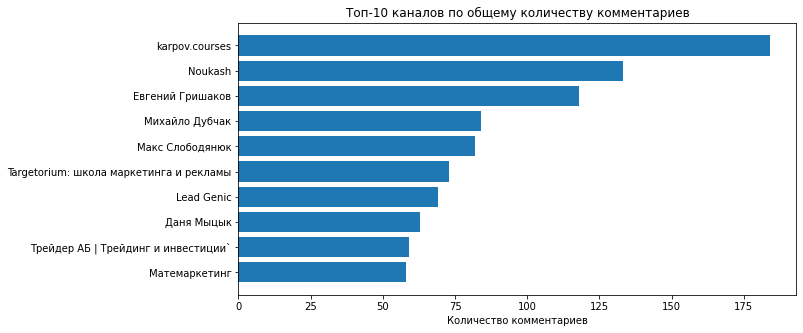

In [32]:
plt.barh(np.array(data.groupby('channelTitle')['commentCount'].sum().sort_values(ascending = False).head(10).index),
    np.array(data.groupby('channelTitle')['commentCount'].sum().sort_values(ascending = False).head(10).values))
plt.gca().invert_yaxis()
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤')
plt.title('–¢–æ–ø-10 –∫–∞–Ω–∞–ª–æ–≤ –ø–æ –æ–±—â–µ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤')
plt.show()

#### –¢–æ–ø-10 –∫–∞–Ω–∞–ª–æ–≤ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –Ω–∞ –æ–¥–Ω–æ –≤–∏–¥–µ–æ –≤ —Å—Ä–µ–¥–Ω–µ–º

In [33]:
data.groupby('channelTitle')['viewCount'].median().sort_values(ascending = False).head(10)

channelTitle
Targetorium: —à–∫–æ–ª–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –∏ —Ä–µ–∫–ª–∞–º—ã    38416.0
–ê–ª–µ–∫—Å–∞–Ω–¥—Ä –£–ª–∏—Ç–∏–Ω                           32922.0
VK Team                                    24558.0
karpov.courses                             21011.0
Tilda Publishing                           19313.0
–ú–∏—Ö–∞–π–ª–æ –î—É–±—á–∞–∫                             19156.0
Computer Science Center                    17373.0
–ê–ª–µ–∫—Å–µ–π –Ø—Ä–æ—à–µ–Ω–∫–æ                           17130.0
Noukash                                    16508.0
–ú–∞–∫—Å –°–ª–æ–±–æ–¥—è–Ω—é–∫                            15711.0
Name: viewCount, dtype: float64

#### –¢–æ–ø-10 –∫–∞–Ω–∞–ª–æ–≤ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ª–∞–π–∫–æ–≤ –Ω–∞ –æ–¥–Ω–æ –≤–∏–¥–µ–æ –≤ —Å—Ä–µ–¥–Ω–µ–º

In [258]:
data.groupby('channelTitle')['likeCount'].median().sort_values(ascending = False).head(10)

channelTitle
Targetorium: —à–∫–æ–ª–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –∏ —Ä–µ–∫–ª–∞–º—ã    1204.0
–ú–∏—Ö–∞–π–ª–æ –î—É–±—á–∞–∫                              986.0
karpov.courses                              948.0
Noukash                                     888.5
–ê–ª–µ–∫—Å–∞–Ω–¥—Ä –£–ª–∏—Ç–∏–Ω                            846.0
Go Viral Central Asia                       525.0
Skypro: –æ–Ω–ª–∞–π–Ω-—É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç                  490.0
–ï–≤–≥–µ–Ω–∏–π –ì—Ä–∏—à–∞–∫–æ–≤                            436.0
Tilda Publishing                            384.0
–ú–∞–∫—Å –°–ª–æ–±–æ–¥—è–Ω—é–∫                             384.0
Name: likeCount, dtype: float64

–ù–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —Ç–æ, —á—Ç–æ –ø–æ –æ–±—â–µ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –∏ –ª–∞–π–∫–æ–≤ –≤–∏–¥–µ–æ –∫–∞–Ω–∞–ª—ã "karpov.courses" –∏ "–ú–∞—Ç–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥" –∑–∞–Ω–∏–º–∞—é—Ç –ø–µ—Ä–≤—ã–µ –ø–æ–∑–∏—Ü–∏–∏, –≤ —Å—Ä–µ–¥–Ω–µ–º –æ–¥–Ω–æ –≤–∏–¥–µ–æ –Ω–∞ –¥–∞–Ω–Ω—ã—Ö –∫–∞–Ω–∞–ª–∞—Ö —Å–æ–±–∏—Ä–∞–µ—Ç –Ω–µ —Ç–∞–∫ –º–Ω–æ–≥–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –∏ –ª–∞–π–∫–æ–≤. –í –ø–µ—Ä–≤—É—é —Ç—Ä–æ–π–∫—É –≤–∏–¥–µ–æ –ø–æ —Å—Ä–µ–¥–Ω–µ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –≤–æ—à–ª–∏ —Å–æ–≤—Å–µ–º –¥—Ä—É–≥–∏–µ –∫–∞–Ω–∞–ª—ã.

In [29]:
len(data[data.channelTitle == 'Targetorium: —à–∫–æ–ª–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –∏ —Ä–µ–∫–ª–∞–º—ã'])

1

–ö—Ä–æ–º–µ —Ç–æ–≥–æ, –∏–∑ –¥–∞–Ω–Ω—ã—Ö —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –ø–æ–Ω—è—Ç–Ω–æ, —á—Ç–æ –Ω–∞ –∫–∞–Ω–∞–ª–µ 'Targetorium: —à–∫–æ–ª–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –∏ —Ä–µ–∫–ª–∞–º—ã' –≤—ã—à–ª–æ –≤–∏–¥–µ–æ, –∫–æ—Ç–æ—Ä–æ–µ –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ —Å –¥–∞–Ω–Ω–æ–≥–æ –∫–∞–Ω–∞–ª–∞ –ø–æ–ø–∞–ª–æ –≤ —Ç–æ–ø-200 –ø–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞–º –≤ –≤—ã–¥–∞—á–µ –ø–æ –∏—Å—Å–ª–µ–¥—É–µ–º–æ–º—É –∑–∞–ø—Ä–æ—Å—É, –∏ –Ω–∞–±—Ä–∞–ª–æ 1204 –ª–∞–π–∫–æ–≤. –ü—Ä–æ–≤–µ—Ä–∏–º, –Ω–∞–∏–±–æ–ª—å—à–µ–µ –ª–∏ —ç—Ç–æ —á–∏—Å–ª–æ –ª–∞–π–∫–æ–≤ —Å—Ä–µ–¥–∏ –≤—Å–µ—Ö –≤–∏–¥–µ–æ —Ç–æ–ø-200. 

In [265]:
data.sort_values(by='likeCount', ascending = False)[['channelTitle','title', 'likeCount']].head(15)

channelTitle  \
1                            karpov.courses   
0                             –ú–∞—Ç–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥   
8                                   Noukash   
2   Targetorium: —à–∫–æ–ª–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –∏ —Ä–µ–∫–ª–∞–º—ã   
4                            karpov.courses   
11                           –ú–∏—Ö–∞–π–ª–æ –î—É–±—á–∞–∫   
5                             –ú–∞—Ç–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥   
3                          –ê–ª–µ–∫—Å–∞–Ω–¥—Ä –£–ª–∏—Ç–∏–Ω   
9                            karpov.courses   
7                          –ê–∫–∞–¥–µ–º–∏—è –Ø–Ω–¥–µ–∫—Å–∞   
22                                  Noukash   
18                    Go Viral Central Asia   
19               Skypro: –æ–Ω–ª–∞–π–Ω-—É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç   
23                            –ì–ª–µ–± –ú–∏—Ö–∞–π–ª–æ–≤   
32                         –ï–≤–≥–µ–Ω–∏–π –ì—Ä–∏—à–∞–∫–æ–≤   

                                                title  likeCount  
1   –ù–∏–∫–∏—Ç–∞ –ú–∞—Ä—à–∞–ª–∫–∏–Ω: A/B-—Ç–µ—Å—Ç—ã —Å–ª–æ–∂–Ω–µ–µ, —á–µ–º –∫–∞–∂–µ—Ç...       1863  
0   –ê–Ω–∞—Ç–æ–ª–∏–π –ö–∞—Ä–ø–æ–≤ - A/B-—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ: –∫–∞–∫ —Å–¥–µ–ª–∞—Ç...       1571  
8   A/B –¢–ï–°–¢–ò–†–û–í–ê–ù–ò–ï: –ü–æ—á–µ–º—É –Ω–∏–∫—Ç–æ –Ω–µ –¥–µ–ª–∞–µ—Ç –µ–≥–æ –ø...       1209  
2   –ö–∞–∫ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–æ–≤–æ–¥–∏—Ç—å —Ä–µ–∫–ª–∞–º–Ω—ã–µ —Ç–µ—Å—Ç—ã? –†–µ–∫–ª–∞...       1204  
4   –ö–∞–∫ –∏ –∑–∞—á–µ–º –æ—Ü–µ–Ω–∏–≤–∞—Ç—å —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è A/B —Ç...       1106  
11  –ö–ê–ö –¢–ï–°–¢–ò–†–û–í–ê–¢–¨ –†–ï–ö–õ–ê–ú–£ –í –§–ï–ô–°–ë–£–ö –ò –ò–ù–°–¢–ê–ì–†–ê–ú?...        986  
5   –í–∞–ª–µ—Ä–∏–π –ë–∞–±—É—à–∫–∏–Ω - A/B-—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–∏ –Ω–µ–≤–æ–∑–º...        897  
3               –ö–ê–ö –ü–†–û–í–û–î–ò–¢–¨ A/B –¢–ï–°–¢–ò–†–û–í–ê–ù–ò–ï –°–ê–ô–¢–ê?        846  
9   –¢–æ–Ω–∫–æ—Å—Ç–∏ A/B —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è: –ø—Ä–æ–±–ª–µ–º–∞ –ø–æ–¥–≥–ª—è–¥—ã–≤–∞...        790  
7   002. –£–≤–µ–ª–∏—á–µ–Ω–∏–µ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –≤ A/B —Å –ø–æ–º–æ—â...        641  
22  A/B –¢–ï–°–¢–ò–†–û–í–ê–ù–ò–ï –ø—Ä–æ—Å—Ç—ã–º–∏ —Å–ª–æ–≤–∞–º–∏. –ö–∞–∫ –ø—Ä–æ–≤–µ—Å—Ç...        568  
18           –í–æ—Ä–∫—à–æ–ø ‚ÄúA/B testing‚Äù | –í–∞–ª–µ—Ä–∏–π –ë–∞–±—É—à–∫–∏–Ω        525  
19  –ê/B —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –≤ Python // –£...        490  
23  –ê/–ë —Ç–µ—Å—Ç—ã: –ø—Ä–æ–ø–æ—Ä—Ü–∏–∏ | –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫...        447  
32  –ö–∞–∫ –æ—Ç—Å–ª–µ–∂–∏–≤–∞—Ç—å –∏ —É–ª—É—á—à–∞—Ç—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∏–≥—Ä—ã? –ê–Ω...        436

–í–∏–¥–µ–æ —Å –∫–∞–Ω–∞–ª–∞ "Targetorium: —à–∫–æ–ª–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –∏ —Ä–µ–∫–ª–∞–º—ã" –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Å–∞–º—ã–º –ø–æ–ø—É–ª—è—Ä–Ω—ã–º –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ª–∞–π–∫–æ–≤. –ù–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –≤–∏–¥–µ–æ –±—ã–ª–∏ –≤—ã–ª–æ–∂–µ–Ω—ã –Ω–∞ –∫–∞–Ω–∞–ª–∞—Ö "karpov.courses" –∏ "–ú–∞—Ç–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥". –ü—Ä–∏ —ç—Ç–æ–º, –≤–∏–¥–µ–æ —Å –∫–∞–Ω–∞–ª–∞ "–ú–∞—Ç–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥", –ø–æ–ª—É—á–∏–≤—à–µ–µ –Ω–∞–∏–±–æ–ª—å—à–µ–µ —á–∏—Å–ª–æ –ª–∞–π–∫–æ–≤, —Å–æ–¥–µ—Ä–∂–∏—Ç –≤—ã—Å—Ç—É–ø–ª–µ–Ω–∏–µ –ê–Ω–∞—Ç–æ–ª–∏—è –ö–∞—Ä–ø–æ–≤–∞, –∫–æ—Ç–æ—Ä—ã–π —è–≤–ª—è–µ—Ç—Å—è –æ—Å–Ω–æ–≤–∞—Ç–µ–ª–µ–º "karpov.courses". –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –¥–≤–∞ —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –≤–∏–¥–µ–æ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ª–∞–π–∫–æ–≤ –ø–æ —Ç–µ–º–µ –∞/–±-—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è —Å–æ–∑–¥–∞–Ω–æ –ø—Ä–∏ —É—á–∞—Å—Ç–∏–∏ –ê–Ω–∞—Ç–æ–ª–∏—è –ö–∞—Ä–ø–æ–≤–∞ –∏ –µ–≥–æ –∫–æ–º–∞–Ω–¥—ã, —á—Ç–æ –º–æ–∂–µ—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ–≤–∞—Ç—å –æ –≤—ã—Å–æ–∫–æ–º —É—Ä–æ–≤–Ω–µ –∏—Ö –∫–æ–º–ø–µ—Ç–µ–Ω—Ü–∏–π –≤ –≤–æ–ø—Ä–æ—Å–∞—Ö –∞/–±-—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –≤—ã—Å–æ–∫–æ–π –æ—Ü–µ–Ω–∫–∏ –∏—Ö —Ä–∞–±–æ—Ç—ã —Å–æ —Å—Ç–æ—Ä–æ–Ω—ã –∞—É–¥–∏—Ç–æ—Ä–∏–∏. 

#### –¢–æ–ø-10 –∫–∞–Ω–∞–ª–æ–≤ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –Ω–∞ –æ–¥–Ω–æ –≤–∏–¥–µ–æ –≤ —Å—Ä–µ–¥–Ω–µ–º 

In [46]:
data.groupby('channelTitle')['commentCount'].median().sort_values(ascending = False).head(10)

channelTitle
–ï–≤–≥–µ–Ω–∏–π –ì—Ä–∏—à–∞–∫–æ–≤                           118.0
–ú–∏—Ö–∞–π–ª–æ –î—É–±—á–∞–∫                              84.0
–ú–∞–∫—Å –°–ª–æ–±–æ–¥—è–Ω—é–∫                             82.0
Targetorium: —à–∫–æ–ª–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –∏ —Ä–µ–∫–ª–∞–º—ã     73.0
Lead Genic                                  69.0
Noukash                                     64.5
–î–∞–Ω—è –ú—ã—Ü—ã–∫                                  63.0
karpov.courses                              41.5
Skypro: –æ–Ω–ª–∞–π–Ω-—É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç                  38.0
–ê–ª–µ–∫—Å–∞–Ω–¥—Ä –£–ª–∏—Ç–∏–Ω                            30.0
Name: commentCount, dtype: float64

In [50]:
data.sort_values(by='commentCount', ascending = False)[['channelTitle','title', 'commentCount']].head(15)

channelTitle  \
31                         –ï–≤–≥–µ–Ω–∏–π –ì—Ä–∏—à–∞–∫–æ–≤   
7                                   Noukash   
10                           –ú–∏—Ö–∞–π–ª–æ –î—É–±—á–∞–∫   
13                          –ú–∞–∫—Å –°–ª–æ–±–æ–¥—è–Ω—é–∫   
2   Targetorium: —à–∫–æ–ª–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –∏ —Ä–µ–∫–ª–∞–º—ã   
32                               Lead Genic   
41                               –î–∞–Ω—è –ú—ã—Ü—ã–∫   
1                            karpov.courses   
4                            karpov.courses   
0                             –ú–∞—Ç–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥   
18               Skypro: –æ–Ω–ª–∞–π–Ω-—É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç   
21                                  Noukash   
23                           karpov.courses   
34        –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –Ø–Ω–¥–µ–∫—Å –î–∏—Ä–µ–∫—Ç –æ—Ç –ê –¥–æ –Ø   
3                          –ê–ª–µ–∫—Å–∞–Ω–¥—Ä –£–ª–∏—Ç–∏–Ω   

                                                title  commentCount  
31  –ö–∞–∫ –æ—Ç—Å–ª–µ–∂–∏–≤–∞—Ç—å –∏ —É–ª—É—á—à–∞—Ç—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∏–≥—Ä—ã? –ê–Ω...           118  
7   A/B –¢–ï–°–¢–ò–†–û–í–ê–ù–ò–ï: –ü–æ—á–µ–º—É –Ω–∏–∫—Ç–æ –Ω–µ –¥–µ–ª–∞–µ—Ç –µ–≥–æ –ø...            94  
10  –ö–ê–ö –¢–ï–°–¢–ò–†–û–í–ê–¢–¨ –†–ï–ö–õ–ê–ú–£ –í –§–ï–ô–°–ë–£–ö –ò –ò–ù–°–¢–ê–ì–†–ê–ú?...            84  
13  –ö–∞–∫ –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å –±–∏–∑–Ω–µ—Å-–∏–¥–µ—é? –ü–æ—ç—Ç–∞–ø–Ω—ã–π –ø–ª–∞–Ω...            82  
2   –ö–∞–∫ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–æ–≤–æ–¥–∏—Ç—å —Ä–µ–∫–ª–∞–º–Ω—ã–µ —Ç–µ—Å—Ç—ã? –†–µ–∫–ª–∞...            73  
32  –§–æ—Ä–º–∞ –æ–±—Ä–∞—Ç–Ω–æ–≥–æ –∑–≤–æ–Ω–∫–∞ –¥–ª—è —Å–∞–π—Ç–∞: —Å–æ–∑–¥–∞–µ–º –±–µ–∑ ...            69  
41  üíô–ê/–ë –¢–ï–°–¢–ò–†–û–í–ê–ù–ò–ï –í FACEBOOK|–û–ë–ó–û–† –§–£–ù–ö–¶–ò–ò|–ö–ê–ö...            63  
1   –ù–∏–∫–∏—Ç–∞ –ú–∞—Ä—à–∞–ª–∫–∏–Ω: A/B-—Ç–µ—Å—Ç—ã —Å–ª–æ–∂–Ω–µ–µ, —á–µ–º –∫–∞–∂–µ—Ç...            55  
4   –ö–∞–∫ –∏ –∑–∞—á–µ–º –æ—Ü–µ–Ω–∏–≤–∞—Ç—å —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è A/B —Ç...            50  
0   –ê–Ω–∞—Ç–æ–ª–∏–π –ö–∞—Ä–ø–æ–≤ - A/B-—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ: –∫–∞–∫ —Å–¥–µ–ª–∞—Ç...            41  
18  –ê/B —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –≤ Python // –£...            38  
21  A/B –¢–ï–°–¢–ò–†–û–í–ê–ù–ò–ï –ø—Ä–æ—Å—Ç—ã–º–∏ —Å–ª–æ–≤–∞–º–∏. –ö–∞–∫ –ø—Ä–æ–≤–µ—Å—Ç...            35  
23  A/B-—Ç–µ—Å—Ç—ã —Å –º–µ—Ç—Ä–∏–∫–∞–º–∏-–æ—Ç–Ω–æ—à–µ–Ω–∏—è–º–∏ –∏ –ø—Ä–∏ —á—ë–º –∑–¥...            33  
34  –Ø–Ω–¥–µ–∫—Å –î–∏—Ä–µ–∫—Ç. –ê–ë —Ç–µ—Å—Ç –æ–±—ä—è–≤–ª–µ–Ω–∏–π –Ø–Ω–¥–µ–∫—Å –î–∏—Ä–µ–∫...            30  
3               –ö–ê–ö –ü–†–û–í–û–î–ò–¢–¨ A/B –¢–ï–°–¢–ò–†–û–í–ê–ù–ò–ï –°–ê–ô–¢–ê?            30

–ë–æ–ª—å—à–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –ø–æ–ª—É—á–∞—é—Ç –≤–∏–¥–µ–æ —Å –ø—Ä–∏–∫–ª–∞–¥–Ω—ã–º —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ–º, —Å–≤—è–∑–∞–Ω–Ω—ã–º —Å –∞–Ω–∞–ª–∏—Ç–∏–∫–æ–π –∏–≥—Ä, —Å–∞–π—Ç–æ–≤, —Ä–µ–∫–ª–∞–º—ã, –∞ –Ω–µ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–µ –≤–∏–¥–µ–æ –ø–æ –ê/–ë-—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—é. 

#### –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–∏–¥–µ–æ –ø–æ –≥–æ–¥–∞–º 

In [33]:
data['publishedAt'] = pd.to_datetime(data['publishedAt'])
data['publishedAt_year'] = data['publishedAt'].dt.year

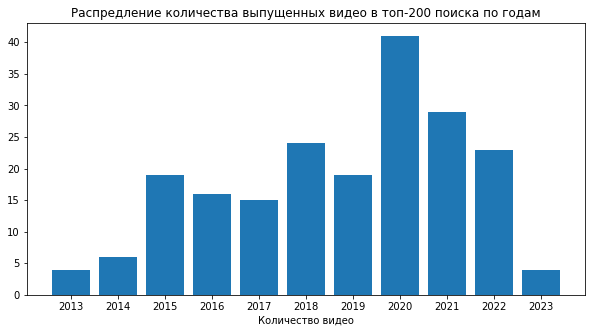

In [42]:
plt.bar(np.array(data.groupby('publishedAt_year')['kind'].count().index),
    np.array(data.groupby('publishedAt_year')['kind'].count().values))
plt.xticks(np.array(data.groupby('publishedAt_year')['kind'].count().index))
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–∏–¥–µ–æ')
plt.title('–†–∞—Å–ø—Ä–µ–¥–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –≤—ã–ø—É—â–µ–Ω–Ω—ã—Ö –≤–∏–¥–µ–æ –≤ —Ç–æ–ø-200 –ø–æ–∏—Å–∫–∞ –ø–æ –≥–æ–¥–∞–º')
plt.show()

–ù–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–∏–¥–µ–æ —Å—Ä–µ–¥–∏ —Ç–æ–ø-200 –ø–æ –∑–∞–ø—Ä–æ—Å—É "–∞/–± —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ" –±—ã–ª–æ –≤—ã–ø—É—â–µ–Ω–æ –≤ 2020-2021 –≥–æ–¥–∞—Ö. –í–æ–∑–º–æ–∂–Ω–æ, –∏–º–µ–Ω–Ω–æ –≤ —ç—Ç–æ—Ç –ø–µ—Ä–∏–æ–¥ —Ç–µ–º–∞ "–∞/–± —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è" –ø–æ–ª—å–∑–æ–≤–∞–ª–∞—Å—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ–π –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å—é –∏ –ø–æ –Ω–µ–π —Å–Ω–∏–º–∞–ª–∏ –º–Ω–æ–≥–æ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –∫–æ–Ω—Ç–µ–Ω—Ç–∞. –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –≤—Å–ø–ª–µ—Å–∫ –≤ 2020 –≥–æ–¥—É –º–æ–∂–µ—Ç –±—ã—Ç—å –æ–±—É—Å–ª–æ–≤–ª–µ–Ω –≤ —Ç–æ–º —á–∏—Å–ª–µ –ø–∞–Ω–¥–µ–º–∏–µ–π, –≤ —É—Å–ª–æ–≤–∏—è—Ö –∫–æ—Ç–æ—Ä–æ–π —É –∞–≤—Ç–æ—Ä–æ–≤ –≤–∏–¥–µ–æ –º–æ–≥–ª–æ –±—ã—Ç—å –±–æ–ª—å—à–µ –≤—Ä–µ–º–µ–Ω–∏ –¥–ª—è —Å–Ω—è—Ç–∏—è –∫–æ–Ω—Ç–µ–Ω—Ç–∞ –Ω–∞ YouTube. 

#### –ß–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è —Å–ª–æ–≤–∞ –≤ –Ω–∞–∑–≤–∞–Ω–∏—è—Ö 

In [32]:
title_words = []
for title in data['title']: 
    for word in title.lower().split():
        title_words.append(''.join(w for w in word if w not in (string.punctuation + string.digits)))

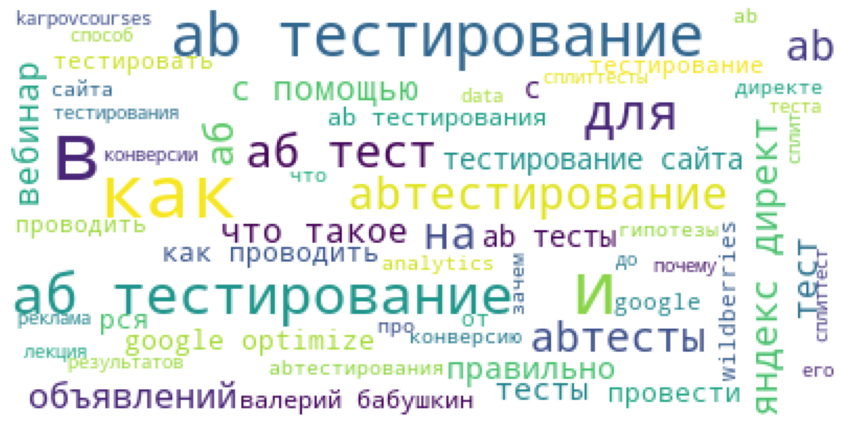

In [33]:
wordcloud = WordCloud(max_font_size=40, max_words=60, background_color="white").generate(' '.join(title_words))
plt.figure(figsize =(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

–í –Ω–∞–∑–≤–∞–Ω–∏—è—Ö –≤–∏–¥–µ–æ —á–∞—â–µ –≤—Å–µ–≥–æ –ø–æ –ø–æ–Ω—è—Ç–Ω—ã–º –ø—Ä–∏—á–∏–Ω–∞–º –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–∞–∑–ª–∏—á–Ω—ã–µ —Ñ–æ—Ä–º—ã —Å–ª–æ–≤–æ—Å–æ—á–µ—Ç–∞–Ω–∏—è "–∞/–± —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ". –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –Ω–∞ –æ—Å–Ω–æ–≤–µ –æ–±–ª–∞–∫–∞ —Å–ª–æ–≤ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –≤ –≤–∏–¥–µ–æ —á–∞—Å—Ç–æ –∏–¥–µ—Ç —Ä–µ—á—å –æ —Ç–æ–º, —á—Ç–æ —Ç–∞–∫–æ–µ –∞/–± —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ, –∑–∞—á–µ–º –∏ –∫–∞–∫ –µ–≥–æ –ø—Ä–æ–≤–æ–¥–∏—Ç—å, –∏ –∫–∞–∫ —Å–¥–µ–ª–∞—Ç—å —ç—Ç–æ –ø—Ä–∞–≤–∏–ª—å–Ω–æ. –ò–º–µ–Ω–Ω–æ —ç—Ç–∏ –≤–æ–ø—Ä–æ—Å—ã –≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å –≤–æ–ª–Ω—É—é—Ç –ª—é–¥–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –∏—â—É—Ç –º–∞—Ç–µ—Ä–∏–∞–ª –Ω–∞ YouTube –ø–æ —Ç–µ–º–µ –∞/–± —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è. 

–ß–∞—Å—Ç—å –≤–∏–¥–µ–æ, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–ø–∞–ª–∏ –≤ —Ç–æ–ø-200 –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ YouTube –ø–æ –∑–∞–ø—Ä–æ—Å—É "–∞/–± —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ", —Å–æ–¥–µ—Ä–∂–∏—Ç –º–∞—Ç–µ—Ä–∏–∞–ª –æ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–∏ —Å–∞–π—Ç–æ–≤, –∞ —Ç–∞–∫–∂–µ, —Å—É–¥—è –ø–æ –æ–±–ª–∞–∫—É —Å–ª–æ–≤, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –¥–ª—è —ç—Ç–æ–≥–æ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–≤, –∫–∞–∫ –Ω–∞–ø—Ä–∏–º–µ—Ä, Google Optimize. –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, —ç—Ç–∞ —Ç–µ–º–∞ –ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –≤—ã—Å–æ–∫–∏–º –∏–Ω—Ç–µ—Ä–µ—Å–æ–º —Å—Ä–µ–¥–∏ —Ç–µ—Ö, –∫—Ç–æ –∏—â–µ—Ç –∫–æ–Ω—Ç–µ–Ω—Ç –ø–æ –∞/–± —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—é.

#### –ß–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è —Å–ª–æ–≤–∞ –≤ –æ–ø–∏—Å–∞–Ω–∏–∏ 

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')

In [227]:
description_words = []
for description in data['description']: 
    for word in description.lower().split():
        title_words.append(''.join(w for w in word if w not in (string.punctuation + string.digits)))
        title_words_filtered = filter(lambda x: x not in stop_words, title_words)

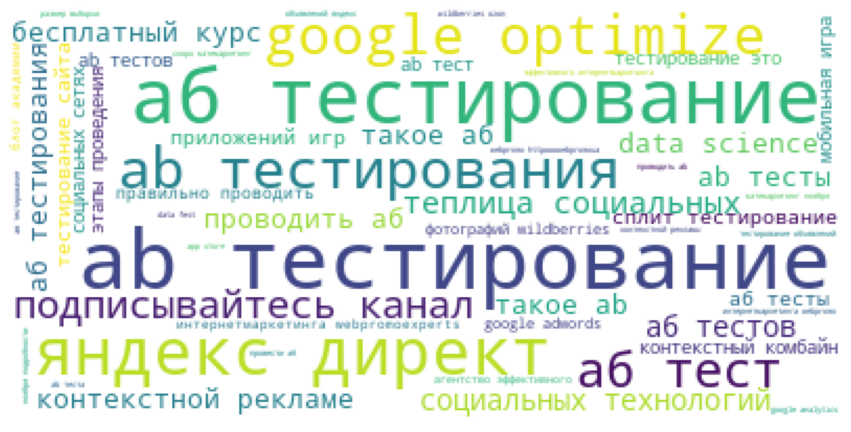

In [228]:
wordcloud = WordCloud(max_font_size=40, max_words=60, background_color="white").generate(' '.join(title_words_filtered))
plt.figure(figsize =(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

–û–±–ª–∞–∫–æ —Å–ª–æ–≤, —Å–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–µ –Ω–∞ –æ—Å–Ω–æ–≤–µ –æ–ø–∏—Å–∞–Ω–∏–π –≤–∏–¥–µ–æ, –ø–æ–ø–∞–≤—à–∏—Ö –≤ —Ç–æ–ø-200, –µ—â—ë —Ç–µ—Ç—á–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –≤ –≤–∏–¥–µ–æ –ø–æ –∞/–± —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—é —á–∞—Å—Ç–æ —Ä–µ—á—å –∏–¥–µ—Ç –æ —Ç–æ–º, –∫–∞–∫ –ø—Ä–æ–≤–æ–¥–∏—Ç—å —Ç–µ—Å—Ç—ã —Å –ø–æ–º–æ—â—å—é —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã—Ö –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–≤, —Ç–∞–∫–∏—Ö –∫–∞–∫ Google Optimize, –∏ —Å—Ä–µ–¥–∞—Ö, —Ç–∞–∫–∏—Ö –∫–∞–∫ –Ø–Ω–¥–µ–∫—Å.–î–∏—Ä–µ–∫—Ç.

#### –ß–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è —Å–ª–æ–≤–∞ –≤ —Ç–µ–≥–∞—Ö

In [57]:
data['tags'] = data['tags'].fillna('')
tags_words = []
for tag in data['tags']: 
    for word in tag:
        tags_words.append(''.join(w for w in word if w not in (string.punctuation + string.digits))) 

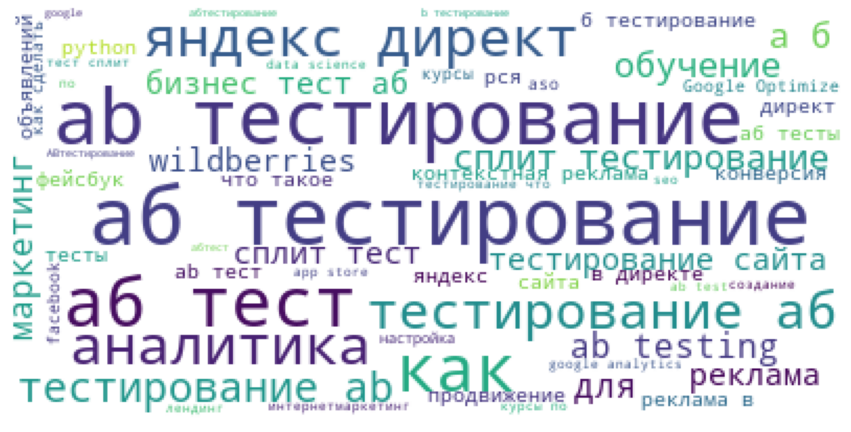

In [59]:
wordcloud = WordCloud(max_font_size=40, max_words=60, background_color="white").generate(' '.join(tags_words))
plt.figure(figsize =(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

–û–±–ª–∞–∫–æ —Å–ª–æ–≤ –ø–æ —Ö–µ—à—Ç–µ–≥–∞–º —Ç–∞–∫–∂–µ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å —Ç–µ–º—ã –∞/–± —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –≤ –Ø–Ω–¥–µ–∫—Å.–î–∏—Ä–µ–∫—Ç–µ, –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è –∞/–± —Ç–µ—Å—Ç–æ–≤ –¥–ª—è —Ä–µ–∫–ª–∞–º—ã –∏ –æ–±—ä—è–≤–ª–µ–Ω–∏–π, –∞ —Ç–∞–∫–∂–µ –≤–æ–ø—Ä–æ—Å–∞ –æ —Ç–æ–º, –∫–∞–∫ —ç—Ç–æ –≤—Å–µ –æ—Å—É—â–µ—Å—Ç–≤–ª—è—Ç—å. 